In [51]:
from sportsipy.nfl.teams import Teams
from scipy.stats import pearsonr
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import collections

In [2]:
print('Correlation(WinRatio,GoalsForRatio)\n')

maxCorr= -1.1
minCorr= 1.1
minYear = 2021
maxYear = 2021
corrList = []
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
        statd[i] = {'Team' : team.name,
                    'W' : team.wins,
                    'L' : team.losses,
                    'GP' : team.games_played,
                    'WinPct' : round(100*team.wins/team.games_played,3),
                    'LosPct' : round(100*team.losses/team.games_played,3),
                    'GF' : team.points_for,
                    'GA' : team.points_against,
                    'GD' : team.points_for-team.points_against,
                    'GfrPct' : round(100*team.points_for/(team.points_for+team.points_against),3),
                    'GD_per' : round((team.points_for-team.points_against)/team.games_played,2)}

    df = pd.DataFrame(statd)
    df = df.transpose()
    
    corr, _ = pearsonr(df['GfrPct'].tolist(), df['WinPct'].tolist())
    corrList.append(corr)
    
    if maxCorr < minCorr:
        minCorr = corr
        maxCorr = corr
        minYear = year
        maxYear = year
        print('%s: %s (new min) (new max)' % (year,round(corr,3)))
    elif corr < minCorr:
        minCorr= corr
        minYear = year
        print('%s: %s (new min)' % (year,round(corr,3)))
    elif corr > maxCorr:
        maxCorr= corr
        maxYear = year
        print('%s: %s (new max)' % (year,round(corr,3)))
    else: 
        print('%s: %s' % (year,round(corr,3)))
        
print('MIN:%s (%s)' % (minYear,round(minCorr,3)))
print('MAX:%s (%s)' % (maxYear,round(maxCorr,3)))
print('AVG:%s' % (round(sum(corrList)/len(corrList),3)))
''' 
1970-2021
MIN:1981 (0.845)
MAX:1984 (0.965)
AVG:0.91
'''

Correlation(WinRatio,GoalsForRatio)

1970: 0.916 (new min) (new max)
1971: 0.883 (new min)
1972: 0.938 (new max)
1973: 0.95 (new max)
1974: 0.922
1975: 0.955 (new max)
1976: 0.911
1977: 0.903
1978: 0.865 (new min)
1979: 0.91
1980: 0.928
1981: 0.845 (new min)
1982: 0.857
1983: 0.882
1984: 0.965 (new max)
1985: 0.916
1986: 0.906
1987: 0.897
1988: 0.923
1989: 0.883
1990: 0.903
1991: 0.911
1992: 0.94
1993: 0.874
1994: 0.893
1995: 0.888
1996: 0.898
1997: 0.928
1998: 0.939
1999: 0.898
2000: 0.92
2001: 0.926
2002: 0.908
2003: 0.909
2004: 0.894
2005: 0.95
2006: 0.904
2007: 0.932
2008: 0.91
2009: 0.913
2010: 0.901
2011: 0.91
2012: 0.92
2013: 0.936
2014: 0.946
2015: 0.932
2016: 0.854
2017: 0.912
2018: 0.921
2019: 0.871
2020: 0.909
MIN:1981 (0.845)
MAX:1984 (0.965)
AVG:0.91


In [7]:
year=1981
teams = list(Teams(year))
statd = {}
    
for i,team in enumerate(teams[0:len(teams)]):
    statd[i] = {'Team' : team.name,
                'W' : team.wins,
                'L' : team.losses,
                'G' : team.games_played,
                'WinPct' : round(100*team.wins/team.games_played,3),
                'LosPct' : round(100*team.losses/team.games_played,3),
                'GF' : team.points_for,
                'GA' : team.points_against,
                'GD' : team.points_for-team.points_against,
                'GfrPct' : round(100*team.points_for/(team.points_for+team.points_against),3),
                'GD_per' : round((team.points_for-team.points_against)/team.games_played,2)}

df = pd.DataFrame(statd)
df = df.transpose()

x = list(df['LosPct'])
seq = sorted(x,reverse=False)
index = [seq.index(v) for v in x]
df['Iwin'] =  index

x = list(df['GD'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Igd'] =  index

x = list(df['GfrPct'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Igfp'] =  index

df['Delta'] = df['Igfp']-df['Iwin']
x = list(df['Delta'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Idel'] =  index

df = df[['Team','W','L','G','GF','GA','GD','WinPct','LosPct','GD_per','GfrPct','Iwin','Igd','Igfp','Delta','Idel']]
df['WINvs50'] = df['WinPct']-50
df_mdian = df.loc[abs(df['GD']) == min(abs((df['GD'])))]
df_mdian = df_mdian[abs(df_mdian['WINvs50']) == min(abs(df_mdian['WINvs50']))]
df_lucky = df[df['Delta'] == max(df['Delta'])].head(1)
df_nluck = df[df['Delta'] == min(df['Delta'])].head(1)
print('%s Luckiest,Median,Unluckiest Teams:' % year)
df_ext = pd.concat([df_lucky,pd.concat([df_mdian,df_nluck],sort=False)],sort=False)
print(df_ext.to_string(index=False))

1981 Luckiest,Median,Unluckiest Teams:
                Team   W  L   G   GF   GA  GD WinPct LosPct GD_per  GfrPct  Iwin  Igd  Igfp  Delta  Idel WINvs50
      Denver Broncos  10  6  16  321  289  32   62.5   37.5      2  52.623     5   14    14      9     0    12.5
 Washington Redskins   8  8  16  347  349  -2     50     50  -0.12  49.856    12   15    15      3     6       0
     Atlanta Falcons   7  9  16  426  355  71  43.75  56.25   4.44  54.545    16    6     8     -8    26   -6.25


In [ ]:
'''
1981 Luckiest,Median,Unluckiest Teams: (most anomolous)
                Team   W  L   G   GF   GA  GD WinPct LosPct GD_per  GfrPct  Iwin  Igd  Igfp  Delta  Idel WINvs50
      Denver Broncos  10  6  16  321  289  32   62.5   37.5      2  52.623     5   14    14      9     0    12.5
 Washington Redskins   8  8  16  347  349  -2     50     50  -0.12  49.856    12   15    15      3     6       0
     Atlanta Falcons   7  9  16  426  355  71  43.75  56.25   4.44  54.545    16    6     8     -8    26   -6.25
    
1984 Luckiest,Median,Unluckiest Teams: (most predictable)
               Team  W  L   G   GF   GA  GD WinPct LosPct GD_per  GfrPct  Iwin  Igd  Igfp  Delta  Idel WINvs50
    New York Giants  9  7  16  299  301  -2  56.25  43.75  -0.12  49.833     8   14    14      6     0    6.25
 Cincinnati Bengals  8  8  16  339  339   0     50     50      0      50    13   12    12     -1    21       0
  Green Bay Packers  8  8  16  390  309  81     50     50   5.06  55.794    13    6     7     -6    27       0
'''

In [40]:
year=1983
teams = list(Teams(year))
statd = {}
    
for i,team in enumerate(teams[0:len(teams)]):
    statd[i] = {'Team' : team.name,
                'W' : team.wins,
                'L' : team.losses,
                'G' : team.games_played,
                'WinPct' : round(100*team.wins/team.games_played,3),
                'LosPct' : round(100*team.losses/team.games_played,3),
                'GF' : team.points_for,
                'GA' : team.points_against,
                'GD' : team.points_for-team.points_against,
                'GfrPct' : round(100*team.points_for/(team.points_for+team.points_against),3),
                'GD_per' : round((team.points_for-team.points_against)/team.games_played,2)}

df = pd.DataFrame(statd)
df = df.transpose()

x = list(df['LosPct'])
seq = sorted(x,reverse=False)
index = [seq.index(v) for v in x]
df['Iwin'] =  index

x = list(df['GfrPct'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Igfp'] =  index

df['Delta'] = df['Igfp']-df['Iwin']
x = list(df['Delta'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Idel'] =  index

df = df[['Team','W','L','G','GF','GA','WinPct','LosPct','GD_per','GfrPct','Iwin','Igfp','Delta','Idel']]
df = df.sort_values(['WinPct','LosPct'],ascending = (False,True))
print('%s NFL Season - Ranked by %% Games Won [>LosPct]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

df = df.sort_values('GfrPct',ascending=False)
print('\n%s NFL Season - Ranked by %% Points Scored [<GfrPct]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

df = df.sort_values('Idel',ascending=True)
print('\n%s NFL Season - Ranked by Luck [<Delta (Igfp-Iwin)]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

1983 NFL Season - Ranked by % Games Won [>LosPct]


,Team,W,L,G,GF,GA,WinPct,LosPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
0,Washington Redskins,14,2,16,541,332,87.5,12.5,13.06,61.97,0,0,0,16
1,Dallas Cowboys,12,4,16,479,360,75,25,7.44,57.092,1,3,2,11
2,Los Angeles Raiders,12,4,16,442,338,75,25,6.5,56.667,1,4,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,New York Giants,3,12,16,267,347,18.75,75,-5,43.485,25,23,-2,23
21,Houston Oilers,2,14,16,288,460,12.5,87.5,-10.75,38.503,26,27,1,13
26,Tampa Bay Buccaneers,2,14,16,241,380,12.5,87.5,-8.69,38.808,26,26,0,16



1983 NFL Season - Ranked by % Points Scored [<GfrPct]


,Team,W,L,G,GF,GA,WinPct,LosPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
0,Washington Redskins,14,2,16,541,332,87.5,12.5,13.06,61.97,0,0,0,16
6,Miami Dolphins,12,4,16,389,250,75,25,8.69,60.876,1,1,0,16
3,San Francisco 49ers,10,6,16,432,293,62.5,37.5,8.69,59.586,4,2,-2,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Philadelphia Eagles,5,11,16,233,322,31.25,68.75,-5.56,41.982,24,25,1,13
26,Tampa Bay Buccaneers,2,14,16,241,380,12.5,87.5,-8.69,38.808,26,26,0,16
21,Houston Oilers,2,14,16,288,460,12.5,87.5,-10.75,38.503,26,27,1,13



1983 NFL Season - Ranked by Luck [<Delta (Igfp-Iwin)]


,Team,W,L,G,GF,GA,WinPct,LosPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
8,St. Louis Cardinals,8,7,16,374,428,50,43.75,-3.38,46.633,6,20,14,0
20,Denver Broncos,9,7,16,302,327,56.25,43.75,-1.56,48.013,6,18,12,1
22,Buffalo Bills,8,8,16,283,351,50,50,-4.25,44.637,12,21,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,Atlanta Falcons,7,9,16,370,389,43.75,56.25,-1.19,48.748,18,14,-4,25
15,Cincinnati Bengals,7,9,16,346,302,43.75,56.25,2.75,53.395,18,7,-11,26
7,Kansas City Chiefs,6,10,16,386,367,37.5,62.5,1.19,51.262,22,8,-14,27


In [56]:
minDelta = 0
maxDelta = 0
deltaList = []
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
        statd[i] = {'Team' : team.name,
                    'LosPct' : round(100*team.losses/team.games_played,3),
                    'GfrPct' : round(100*team.points_for/(team.points_for+team.points_against),3)}
        
    df = pd.DataFrame(statd)
    df = df.transpose()

    x = list(df['LosPct'])
    seq = sorted(x,reverse=False)
    index = [seq.index(v) for v in x]
    df['Iwin'] =  index

    x = list(df['GfrPct'])
    seq = sorted(x,reverse=True)
    index = [seq.index(v) for v in x]
    df['Igfp'] =  index

    df['Delta'] = df['Igfp']-df['Iwin']
    x = list(df['Delta'])
    
    locMinDelta = int(min(df['Delta']))
    locMinTeam = df.Team[df['Delta'] == locMinDelta]
    locMinTeam = locMinTeam.to_string(index=False)
    locMaxDelta = int(max(df['Delta']))
    locMaxTeam = df.Team[df['Delta'] == locMaxDelta]
    locMaxTeam = locMaxTeam.to_string(index=False)
    
    if maxDelta == minDelta:
        minDelta = locMinDelta
        maxDelta = locMaxDelta
        minTeam = locMinTeam
        maxTeam = locMaxTeam
        minYear = year
        maxYear = year
        print('%s %s: %s (new minDelta) (new maxDelta)' % (year,locMinTeam,round(minDelta,3)))
    if locMinDelta < minDelta:
        minDelta= locMinDelta
        minTeam = locMinTeam
        minYear = year
        print('%s %s: %s (new min)' % (year,locMinTeam,round(minDelta,3)))
    if locMaxDelta > maxDelta:
        maxDelta = locMaxDelta
        maxTeam = locMaxTeam
        maxYear = year
        print('%s %s: %s (new max)' % (year,locMaxTeam,round(maxDelta,3)))
    
    for d in x:
        deltaList.append(d)

deltaList=sorted(deltaList,reverse=False)

1970  St. Louis Cardinals: -5 (new minDelta) (new maxDelta)
1971  Cincinnati Bengals: -13 (new min)
1971  Chicago Bears: 10 (new max)
1978  Atlanta Falcons: 17 (new max)
1983  Kansas City Chiefs: -14 (new min)


In [63]:
print('median: ' + str(statistics.median(deltaList)))
print('mean: ' + str(round(statistics.mean(deltaList),2)))
print('mode: ' + str(statistics.mode(deltaList)))
print('pstdev: ' + str(round(statistics.pstdev(deltaList),2)))
print('pvariance: ' + str(round(statistics.pvariance(deltaList),2)))

quartiles=[round(q, 1) for q in statistics.quantiles(deltaList, n=4, method='inclusive')]
print('quartiles(incl): '+ str(quartiles))
quartiles=[round(q, 1) for q in statistics.quantiles(deltaList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 1) for q in statistics.quantiles(deltaList, n=10, method='inclusive')]
print('deciles(incl): '+ str(deciles))
deciles=[round(q, 1) for q in statistics.quantiles(deltaList, n=10)]
print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(deltaList)))

median: 1
mean: 1.23
mode: 0
pstdev: 3.94
pvariance: 15.55
quartiles(incl): [-1.0, 1.0, 3.0]
quartiles(excl): [-1.0, 1.0, 3.0]
deciles(incl): [-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 6.0]
deciles(excl): [-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 6.0]
count: 1509


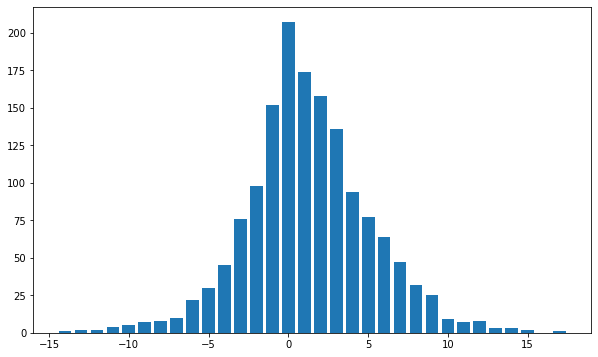

In [55]:
counter=collections.Counter(deltaList)
dely = list(counter.values())
delx = list(counter.keys())
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(delx,dely)
plt.show()

In [62]:
pd.DataFrame(list(zip(delx,dely)),columns=['delta','freq'])

,delta,freq
0,-14,1
1,-13,2
2,-12,2
3,-11,4
4,-10,5
5,-9,7
6,-8,8
7,-7,10
8,-6,22
9,-5,30
